# 캐글 - 타이타닉 생존자 예측하기

## (4) 데이터 전처리

Wrangle data

데이터 분석에서 수집한 몇 가지 가정과 결정을 토대로, 직접 데이터를 수정하고 생성하고 완성한다.

앞 노트북에서 수행한 것들을 불러온다.

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 c

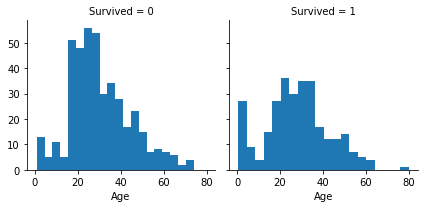

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


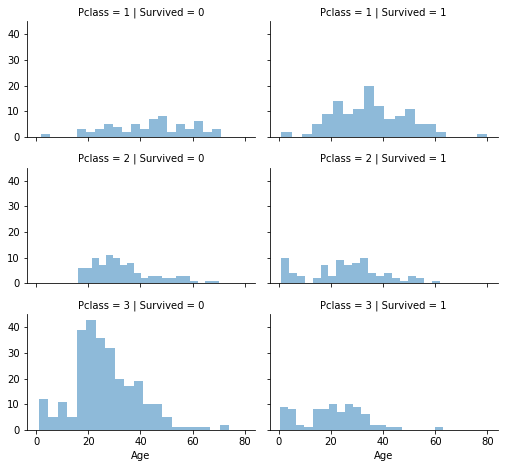

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


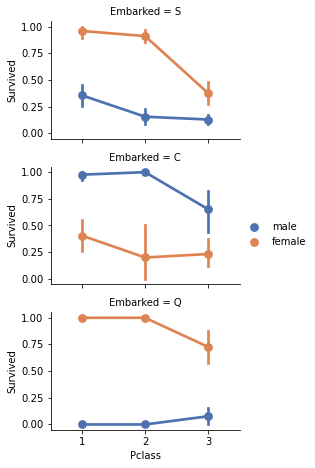

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


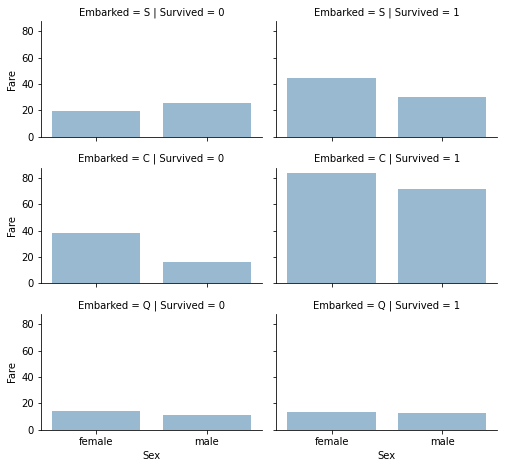

In [15]:
%run Titanic_ML23_데이터불러오고분석.ipynb

### 데이터 분석 과정에서 도출해낸 가정과 결정

__Correlating__

<u>가정</u>

각 특징이 생존과 어떤 상관관계가 있는 지 알고 싶다. 


__Completing__

<u>가정</u>

1. Age 특징은 생존과 확실한 연관이 있으므로 완성할 수 있다.
2. Embarked 특징은 생존 또는 다른 중요한 특징과 관련이 있을 수 있으므로 완성할 수 있다.

<u>결정</u>

1. Age 특징의 null 값을 채운다.
2. 모델 학습을 위해 Embarked 특징을 완성한다.

__Correcting__

<u>가정</u>

1. Ticket 특징은 중복 비율(22%)이 높고 티켓과 생존 간 상관 관계가 없기 때문에 분석에서 제외할 수 있다.
2. Cabin 특징은 꽤 불완전하며 null 값을 많이 포함하므로, 학습과 테스트 데이터 모두에서 제거할 수 있다.
3. PassengerId는 생존과 관련이 없으므로 학습 데이터에서 제거할 수 있다.
4. Name 특징은 상대적으로 비표준적이고 생존에 직접적으로 관련이 없으므로 제외할 수 있다.


__Creating__

<u>가정</u>

1. Parch와 SibSp를 이용해 Family라는 새로운 특징을 만들어서 탑승한 총 가족 수를 확인할 수 있다.
2. Name 특징을 공학하여 Title(칭호)을 새로운 특징으로 추출할 수 있다.
3. Age bands(연령대) 특징을 새로 만들어서 연속 수치형 자료를 순서 범주형 자료로 변환할 수 있다.
4. 분석에 도움이 된다면, Fare range(운임 범위) 특징을 새로 만들 수 있다.

<u>결정</u>

3. Age를 연령대로 나눠야 한다.
4. Fare range(운임 범위) 특징을 생성한다.


- 모델 학습에 Sex 특징을 추가한다.
- 모델 학습을 위해 Embarked 특징을 추가한다.


__Classifying__

<u>가정</u>

앞에서 한 (1)문제 정의를 바탕으로, 가정을 추가할 수 있다.

1. 여자(Sex=female)의 생존 확률이 더 높다.
2. 아이(Age<?)의 생존 확률이 더 높다.
3. 상류층(Pclass=1)의 생존 확률이 더 높다.

<u>결정</u>

2. 모델 학습에서 Age를 고려해야한다.


### 특징을 삭제하여 수정

특징을 삭제함으로써 데이터 포인트 수를 줄일 수 있다. 노트북의 속도를 빠르게 하고, 분석을 용이하게 한다.

앞에서 한 가정과 결정에 따라 Cabin(Correcting #2)과 Ticket(Correcting #1) 특징을 삭제하려고 한다.

해당되는 경우, 일관성 유지를 위해 학습과 테스트 데이터에 동일한 작업을 수행한다.

In [16]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

### 기존 특징에서 추출해서 새로운 특징 생성

Name 특징과 PassengerId 특징을 삭제하기 전에, Name 특징에서 Title(호칭)을 추출하고 호칭과 생존 간의 상관 관계를 테스트할 수 있는 지 분석한다.

다음 코드에서 정규 표현식을 사용하여 Title(호칭) 특징을 추출한다. RegEx 패턴 (\w+\.)은 Name 특징에서 온점 문자로 끝나는 첫 번째 단어와 일치한다. expand=False 플래그는 DataFrame을 반환한다.

__관찰__

Title, Age, Survived 도표를 만들 때, 다음의 관찰을 주목한다.

대부분의 Title은 연령대를 정확하게 묶는다. 예를 들어, 호칭 Master의 평균 연령은 5살이다. Title 연령대 간 생존률은 약간 다르다. 특정 호칭은 대부분 살아남았거나(Mme, Lady, Sir) 살아남지 못했다(Don, Rev, Jonkheer). 

__결정__

모델 학습을 위해 새로운 Title 특징을 유지하기로 한다.

In [19]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


많은 호칭들을 더 일반적인 이름으로 바꾸거나 Rare로 분류할 수 있다.

In [21]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


호칭을 범주형에서 순서형으로 바꿀 수 있다.

In [22]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


이제 Name 특징을 학습과 테스트 데이터에서 안전하게 제거할 수 있다. 학습 데이터에는 PassengerId 특징도 필요하지 않다.

In [23]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

### 범주형 특징 변환

문자열을 포함하는 특징을 숫자 값으로 변환할 수 있다. 이 작업은 대부분의 모델 알고리즘에서 필요하다. 또한 특징 완성을 하는 데에도 도움이 된다.

Sex 특징을 Gender(female=1, male=0)라는 새로운 특징으로 변환한다.

In [24]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### 연속 수치형 특징 완성

결측값이나 null 값이 있는 특징을 추정하고 완성해야 한다. 먼저, Age 특징에 대해 이 작업을 수행한다.

연속 수치형 자료를 완성하기 위해서 세 가지 방법을 고려할 수 있다.

1. 간단한 방법은 평균과 표준 편차 사이의 난수를 생성하는 것이다.


2. 결측값을 추측하는 보다 정확한 방법은 다른 연관된 특징을 사용하는 것이다. Age, Gender, Pclass 간의 상관관계에 주목한다. Pclass와 Gender 특징을 조합한 묶음에서 Age의 중앙값을 사용하여 Age 값을 추측한다. Pclass=1이고 Gender=0일 때 Age의 중앙값, Pclass=1이고 Gender=1일 때 Age의 중앙값...


3. 첫 번째 방법과 두 번째 방법을 결합한다. 중앙값을 기준으로 연령을 추측하는 대신, Pclass와 Gender를 조합한 묶음을 기반으로 평균과 표준 편차 사이의 난수를 생성한다.

첫 번째 방법과 세 번째 방법은 모델에 Random Noise를 가져오기 때문에, 여러 번 실행한 결과가 다를 수 있다. 따라서, 두 번째 방법을 선호한다.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


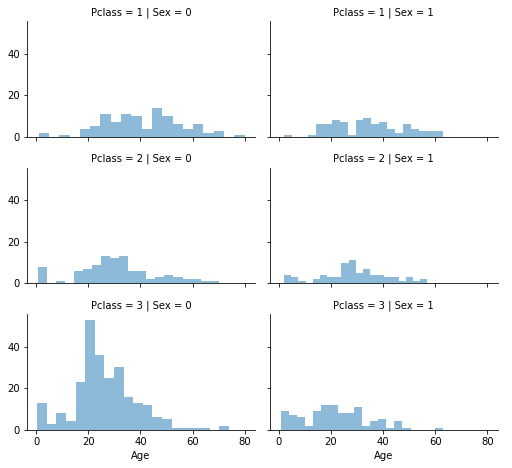

In [25]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Pclass x Gender 조합을 기반으로 추측한 Age 값을 담을 빈 배열을 준비한다.

In [26]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Sex(0 또는 1)과 Pclass(1,2,3)을 반복하여 여섯 가지 조합에 대한 Age의 추측값을 계산한다.

In [27]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


AgeBand(연령대) 특징을 만들어서 Survived와의 상관관계를 결정한다.

In [28]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


다음 범위를 기준으로 Age를 서수로 바꾼다.

In [29]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


이제 AgeBand 특징을 지운다.

In [30]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


### 기존의 특징을 조합하여 새로운 특징 생성

Parch와 SibSp를 조합하여 FamilySize 특징을 새로 만들고, 데이터에서 Parch와 SibSp를 제거한다.

In [31]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


isAlone이라는 또 다른 새로운 특징을 만든다.

In [32]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


IsAlone을 위해 Parch, SibSp, FamilySize 특징을 삭제한다.

In [33]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


Pclass와 Age를 결합한 인공적인 특징을 만들 수 있다.

Cf. 데이터 분석 단계의 <수치형과 순서형 특징의 상관 관계>에서, Pclass와 Age의 상관 관계가 있다는 관찰 결과가 있었다.

In [34]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


### 범주형 특징 완성

Embarked 특징은 승선 항구에 따라 S, Q, C로 나뉜다. 학습 데이터에는 두 개의 결측값이 있다. 간단하게, 가장 많이 발생한 값으로 결측값을 채운다.

In [35]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [36]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### 범주형 특징을 수치형으로 변환

새로운 수치형 특징인 Port를 생성하여 Embarked 특징을 변환할 수 있다.

In [37]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


### 수치형 특징의 빠른 완성과 변환

Fare 특징에 있는 단일 결측값을 채우기 위해, 테스트 데이터에 있는 mode를 사용하여 이 특징에서 가장 많이 발생하는 값을 얻는다. 코드 한 줄로 이 작업을 수행한다.

단일 값만 대체하므로, 누락된 특징을 추측하기 위해 중간에 새로운 특징을 생성하거나 상관관계에 대한 추가 분석을 수행하지 않는다. 데이터 완성으로, 모델 알고리즘이 null이 아닌 값에서 작동하는 데 필요한 요구사항을 달성한다.

통화(currency)를 나타내기 때문에 운임을 소수점 이하 두 자리로 반올림할 수도 있다.

In [38]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


FareBand(운임 범위) 특징을 생성할 수 있다.

In [40]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


FareBand를 기준으로, Fare 특징을 서수값으로 변환한다.

In [41]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


테스트 데이터는 다음과 같다.

In [42]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


------------------------------------------------------------

데이터 전처리를 완료했다.

## 참고자료

캐글 노트북
https://www.kaggle.com/c/titanic/overview